# PIMA Indians Diabetes

## Background

**Diabetes**, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period.  Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger.  If left untreated, diabetes can cause many complications.  Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death.  Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This **dataset** is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Objective

We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## Data


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

1. **Pregnancies**: Number of times pregnant
2. **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. **BloodPressure**: Diastolic blood pressure (mm Hg)
4. **SkinThickness**: Triceps skin fold thickness (mm)
5. **Insulin**: 2-Hour serum insulin (mu U/ml)
6. **BMI**: Body mass index (weight in kg/(height in m)^2)
7. **DiabetesPedigreeFunction**: Diabetes pedigree function
8. **Age**: Age (years)
9. **Outcome**: Class variable (0 or 1)

## Step 0: Basic Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load Dataset

In [2]:
df = pd.read_csv('data/diabetes.csv') #relative path
print(df.shape)
df.sample(5)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
425,4,184,78,39,277,37.0,0.264,31,1
344,8,95,72,0,0,36.8,0.485,57,0
695,7,142,90,24,480,30.4,0.128,43,1
350,4,92,80,0,0,42.2,0.237,29,0
734,2,105,75,0,0,23.3,0.560,53,0


## Step 2: Feature Engineering and Data Visualisation

### 2.1. Identifying and correcting Data types

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### 2.2. Correlation between features

Variables within a dataset can be related for lots of reasons. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation. 

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

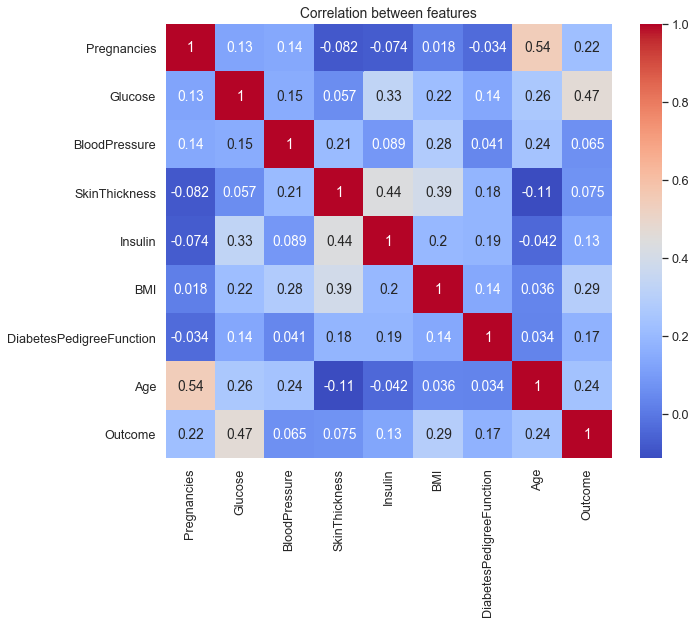

In [4]:
sns.set(font_scale=1.15)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation between features');

### 2.3. Data Visualisation & Feature Selection

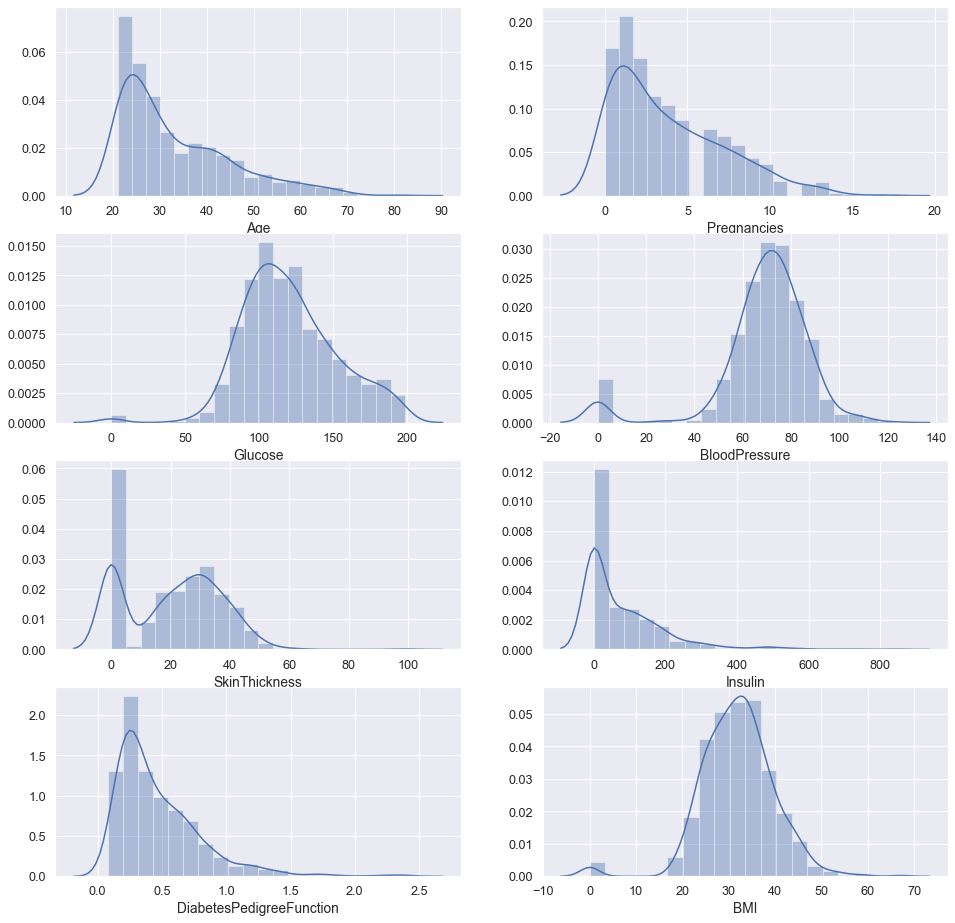

In [5]:
# Dist Plot
## Dist Plot helps us to flexibly plot a univariate distribution of observations.
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(16,16))

#feature 1
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 

#feature 2
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 

#feature 3
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 

#feature 4
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 

#feature 5
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])

#feature 6
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])

#feature 7
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 

#feature 8
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

output shows that there are many values for the coloumns that are zero.

In [6]:
# Lets check the figures as well
for col in df.columns:
    if col not in ['Pregnancies', 'Outcome']:
        print ('0 values in', col, ':', sum(df[col]==0))

0 values in Glucose : 5
0 values in BloodPressure : 35
0 values in SkinThickness : 227
0 values in Insulin : 374
0 values in BMI : 11
0 values in DiabetesPedigreeFunction : 0
0 values in Age : 0


### 2.4. Fixing Missing Values - Imputer

In [7]:
df.isnull().sum() #isnull counts NaN

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='median')

In [9]:
df.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
509,8,120,78,0,0,25.0,0.409,64,0
158,2,88,74,19,53,29.0,0.229,22,0


In [10]:
# df[df.columns[1:8]] --> This is slicing of dataframe based on selected columns
df[df.columns[1:8]] = pd.DataFrame(imputer.fit_transform(df[df.columns[1:8]]))

In [11]:
# Lets check the figures again
for col in df.columns:
    if col not in ['Pregnancies', 'Outcome']:
        print ('0 values in', col, ':', sum(df[col]==0))

0 values in Glucose : 0
0 values in BloodPressure : 0
0 values in SkinThickness : 0
0 values in Insulin : 0
0 values in BMI : 0
0 values in DiabetesPedigreeFunction : 0
0 values in Age : 0


## Step 3: Defining Training and Test Set

In [12]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1] #features
y = df.iloc[:, -1] #target
X.shape, y.shape

((768, 8), (768,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((576, 8), (576,), (192, 8), (192,))

## Step 4: Data Scaling- StandScaler / MinMaxScaler

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) #calculates mean(x), std(x)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Step 5. Modelling

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

#Model
LR = LogisticRegression(solver="sag", max_iter=10000)

#fiting the model
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
oneD_vec = X_test[3]
oneD_vec.shape

(8,)

In [40]:
tD_vec = oneD_vec.reshape((1,8))
tD_vec.shape

(1, 8)

In [42]:
LR.predict_proba(tD_vec) #predict_proba --> will return probability of each class

array([[0.32368447, 0.67631553]])

In [43]:
LR.predict(tD_vec) #predict ---> will return the class label

array([1])

In [50]:
#prediction
y_pred = LR.predict(X_test)

In [51]:
#Accuracy
print("Testing Accuracy ", LR.score(X_test, y_test)*100)

Testing Accuracy  78.64583333333334


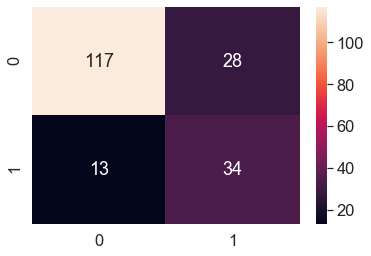

In [48]:
#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Testing Accuracy ", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Decision Tree hyperparameter tuning.
DTC = DecisionTreeClassifier()

# Define parameter grid.
dt_param_grid = {"max_depth": [4, 6, 8, 10],
                 "max_features": ["sqrt", "log2", 2, 5, 8],
                 "min_samples_split": [3, 4, 5, 10],
                 "min_samples_leaf": [3, 4, 5, 10],
                 "criterion": ["gini", "entropy"],
                 "class_weight": [None, 'balanced']
                }

# Search grid and store best estimator.
gsDTC = GridSearchCV(DTC,param_grid = dt_param_grid, cv=5, 
                     scoring="f1")

gsDTC.fit(X_train,y_train)
DTC_best = gsDTC.best_estimator_

# Print best score.
print('Best score: {}'.format(gsDTC.best_score_))
print('Best parameters: {}'.format(gsDTC.best_params_))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest hyperparameter tuning. 
RFC = RandomForestClassifier()

# Define parameter grid.
rf_param_grid = {"max_depth": [4, 6, 8, 10],
                 "max_features": ["sqrt", "log2", 2, 5, 8],
                 "min_samples_split": [3, 4, 5, 8],
                 "min_samples_leaf": [3, 4, 5, 8],
                 "bootstrap": [False, True],
                 "n_estimators" :[100],
                 "criterion": ["gini", "entropy"],
                 "class_weight": [None, 'balanced']
                }
                
# Search grid and store best estimator.
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=4, scoring="f1", n_jobs= 4)
gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

# Print best score.
print('Best score: {}'.format(gsRFC.best_score_))
print('Best parameters: {}'.format(gsRFC.best_params_))

In [ ]:
#Look at feature importances for best model.
RFC_best.fit(X_train,y_train)
features_best = pd.DataFrame()
features_best['feature'] = X_train.columns
features_best['importance'] = RFC_best.feature_importances_
features_best.sort_values(by=['importance'], ascending=True, inplace=True)
features_best.set_index('feature', inplace=True)

#Plot.
print("\nFeature Importances for Best Model:")
ax = features_best.plot(kind='barh', figsize=(20, 14), fontsize=20)
ax.set_ylabel("Features", fontname="Arial", fontsize=24)

In [ ]:
# Print Classification Report for both training and test data.
test_predictions = RFC_best.predict(X_test)
train_predictions = RFC_best.predict(X_train)
print('\n***Training Data***')
print('\nClassification Report:')
print(classification_report(y_train, train_predictions))
print('\n***Test Data***')
print('\nClassification Report:')
print(classification_report(y_test, test_predictions))

### Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

In [ ]:
#Model
model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

### Stacking

#### First level model
Defining the first level models for stacking. <br> 
We are using three models: 
- KNN-Classifier, 
- Random Forest Classifier
- XGBoost Classifier.

In [ ]:
# !pip install vecstack
# Also refer to: https://github.com/vecxoz/vecstack

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [ ]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [ ]:
S_train, S_test = stacking(models, X_train, y_train, X_test, 
                           regression=False, mode='oof_pred_bag', 
                           needs_proba=False, save_dir=None, 
                           metric=accuracy_score, n_folds=4, 
                           stratified=True, shuffle=True, 
                           random_state=0,    
                           verbose=2)

#### Second level model

In [ ]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))